# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 597
['grytviken', 'hamilton', 'kone', 'fale old settlement', 'sandwip', 'aydincik', 'port alfred', 'afif', 'uturoa', 'papatowai', 'waitangi', 'sesheke', 'ofunato', 'invercargill', 'revda', 'port-aux-francais', 'adamstown', 'carnarvon', 'iqaluit', 'taiohae', 'mogocha', 'blackmans bay', 'queenstown', 'bethel', 'roma', 'trevelin', 'vieux fort', 'iskateley', 'humberto de campos', 'nemuro', 'guozhen', 'novodvinsk', 'edinburgh of the seven seas', 'olonkinbyen', 'tromso', 'avarua', 'port mathurin', 'susuman', 'boguchany', 'kanniyakumari', 'hermanus', 'puerto ayora', 'west island', 'vadso', 'suicheng', 'champasak', 'vorkuta', 'morehead city', 'walvis bay', 'guerrero negro', 'sultanah', 'talcahuano', 'hawaiian paradise park', 'lebu', 'puerto san carlos', 'yellowknife', 'fairlawn', 'arar', 'al qubbah', 'sindhnur', 'toga village', 'atafu village', 'happy valley-goose bay', 'petropavlovsk-kamchatsky', 'margaret river', 'ilulissat', 'kargasok', 'ust-nera', 'newman', 'b

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"
    response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (response['weather'][0])

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"] - 273.15
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | hamilton
Processing Record 3 of Set 1 | kone
Processing Record 4 of Set 1 | fale old settlement
Processing Record 5 of Set 1 | sandwip
Processing Record 6 of Set 1 | aydincik
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | afif
Processing Record 9 of Set 1 | uturoa
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | sesheke
Processing Record 13 of Set 1 | ofunato
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | revda
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | mogocha
Processing Record 22 of Set 1 | blackmans bay
Pr

Processing Record 42 of Set 4 | lethem
Processing Record 43 of Set 4 | canutillo
Processing Record 44 of Set 4 | egilsstadir
Processing Record 45 of Set 4 | namtsy
Processing Record 46 of Set 4 | zeribet el oued
Processing Record 47 of Set 4 | saint-philippe
Processing Record 48 of Set 4 | dunedin
Processing Record 49 of Set 4 | portland
Processing Record 0 of Set 5 | dalnerechensk
Processing Record 1 of Set 5 | mount pearl
Processing Record 2 of Set 5 | isafjordur
Processing Record 3 of Set 5 | bargara
City not found. Skipping...
Processing Record 4 of Set 5 | lazaro cardenas
Processing Record 5 of Set 5 | mudgee
Processing Record 6 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 7 of Set 5 | vedea
Processing Record 8 of Set 5 | lock haven
Processing Record 9 of Set 5 | mammoth lakes
Processing Record 10 of Set 5 | college
Processing Record 11 of Set 5 | utrik
Processing Record 12 of Set 5 | el nido
Processing Record 13 of Set 5 | paita
Processing Record 14 of Set 5 |

Processing Record 32 of Set 8 | zhosaly
Processing Record 33 of Set 8 | agustin codazzi
Processing Record 34 of Set 8 | tidjikja
Processing Record 35 of Set 8 | elko
Processing Record 36 of Set 8 | sanming
Processing Record 37 of Set 8 | amga
Processing Record 38 of Set 8 | katabu
Processing Record 39 of Set 8 | amriswil
Processing Record 40 of Set 8 | callao
Processing Record 41 of Set 8 | comodoro rivadavia
Processing Record 42 of Set 8 | tabou
Processing Record 43 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 44 of Set 8 | juankoski
Processing Record 45 of Set 8 | alice springs
Processing Record 46 of Set 8 | codrington
Processing Record 47 of Set 8 | tasbuget
City not found. Skipping...
Processing Record 48 of Set 8 | bodo
Processing Record 49 of Set 8 | marica
Processing Record 0 of Set 9 | eraan
Processing Record 1 of Set 9 | kefamenanu
Processing Record 2 of Set 9 | puerto penasco
Processing Record 3 of Set 9 | luau
Processing Record 4 of Set 9 | essaouira


Processing Record 20 of Set 12 | ceelbuur
Processing Record 21 of Set 12 | dar naim
City not found. Skipping...
Processing Record 22 of Set 12 | kargil
Processing Record 23 of Set 12 | gonzaga
Processing Record 24 of Set 12 | homer
Processing Record 25 of Set 12 | zarghun shahr
Processing Record 26 of Set 12 | saint-affrique
Processing Record 27 of Set 12 | venice
Processing Record 28 of Set 12 | bhamo
Processing Record 29 of Set 12 | mahibadhoo
Processing Record 30 of Set 12 | korla
Processing Record 31 of Set 12 | namdrik
Processing Record 32 of Set 12 | baotou
Processing Record 33 of Set 12 | guaimaca
Processing Record 34 of Set 12 | ebon
Processing Record 35 of Set 12 | isangel
Processing Record 36 of Set 12 | la mira
Processing Record 37 of Set 12 | bom jesus
Processing Record 38 of Set 12 | shindand
Processing Record 39 of Set 12 | nuku'alofa
Processing Record 40 of Set 12 | kristiansund
Processing Record 41 of Set 12 | tejen
Processing Record 42 of Set 12 | mahina
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,3.34,94,100,2.40,GS,1684538871
1,hamilton,39.1834,-84.5333,24.58,68,20,6.69,US,1684538811
2,kone,-21.0595,164.8658,25.00,47,34,2.61,NC,1684539042
3,fale old settlement,-9.3852,-171.2468,28.61,81,58,6.04,TK,1684538942
4,sandwip,22.4678,91.4561,28.60,83,1,5.91,BD,1684539043


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,3.34,94,100,2.40,GS,1684538871
1,hamilton,39.1834,-84.5333,24.58,68,20,6.69,US,1684538811
2,kone,-21.0595,164.8658,25.00,47,34,2.61,NC,1684539042
3,fale old settlement,-9.3852,-171.2468,28.61,81,58,6.04,TK,1684538942
4,sandwip,22.4678,91.4561,28.60,83,1,5.91,BD,1684539043


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

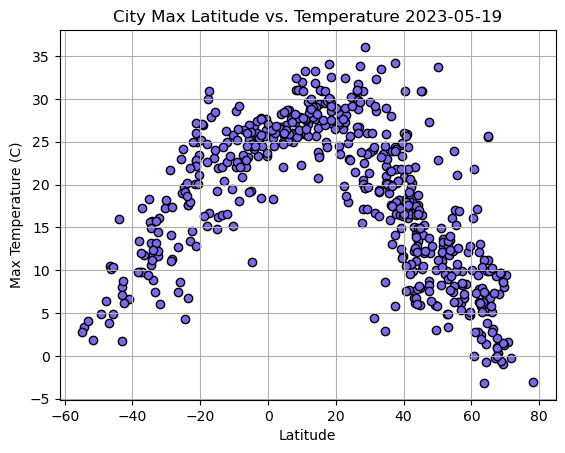

In [93]:
# Build scatter plot for latitude vs. temperature
lat_all = city_data_df["Lat"]
temp_all = city_data_df["Max Temp"]
plt.scatter(lat_all, temp_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')
plt.title("City Max Latitude vs. Temperature 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

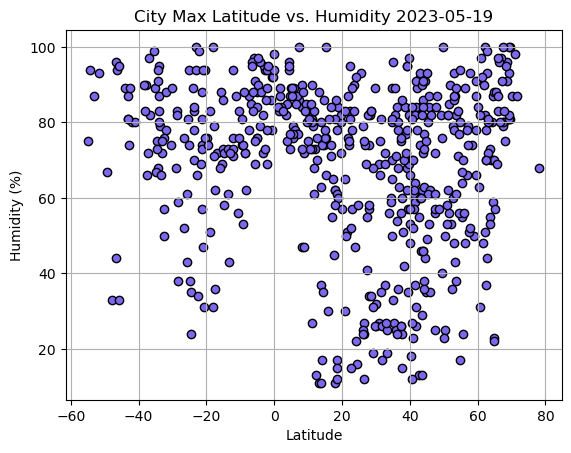

In [92]:
# Build the scatter plots for latitude vs. humidity
lat_all = city_data_df["Lat"]
humid_all = city_data_df["Humidity"]
plt.scatter(lat_all, humid_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title("City Max Latitude vs. Humidity 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

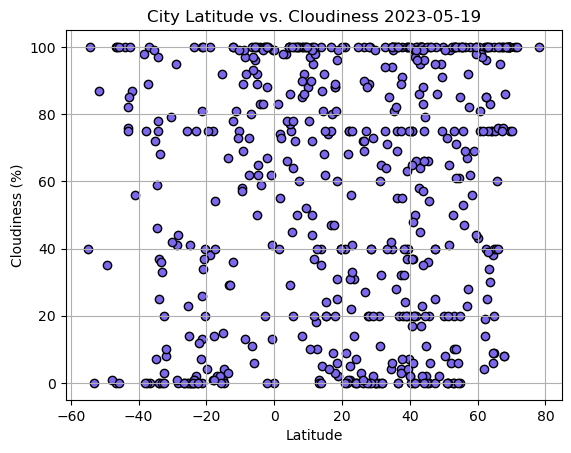

In [91]:
# Build the scatter plots for latitude vs. cloudiness
lat_all = city_data_df["Lat"]
cloud_all = city_data_df["Cloudiness"]
plt.scatter(lat_all, cloud_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

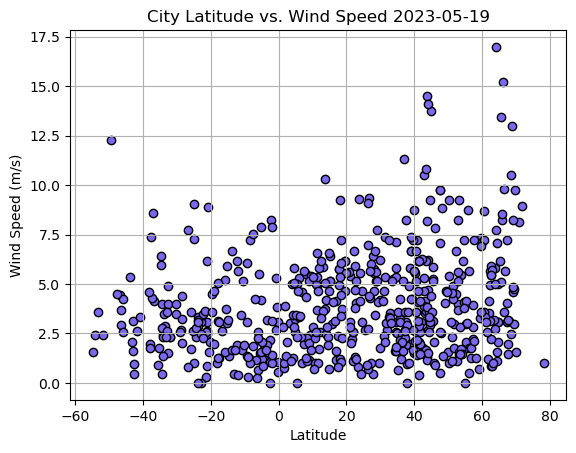

In [90]:
# Build the scatter plots for latitude vs. wind speed
lat_all = city_data_df["Lat"]
wind_all = city_data_df["Wind Speed"]
plt.scatter(lat_all, wind_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs. Wind Speed 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [79]:
# Define a function to create Linear Regression plots
def linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    r_squared = round(rvalue**2, 16)
    print(f"The r-value is: {r_squared}")
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()
    
    return line_eq, r_squared

In [80]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hamilton,39.1834,-84.5333,24.58,68,20,6.69,US,1684538811
4,sandwip,22.4678,91.4561,28.60,83,1,5.91,BD,1684539043
5,aydincik,36.1437,33.3202,17.66,84,55,1.76,TR,1684539043
7,afif,23.9065,42.9172,22.97,47,0,5.53,SA,1684539044
12,ofunato,39.0717,141.7167,14.88,95,100,1.95,JP,1684539045


In [81]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,3.34,94,100,2.40,GS,1684538871
2,kone,-21.0595,164.8658,25.00,47,34,2.61,NC,1684539042
3,fale old settlement,-9.3852,-171.2468,28.61,81,58,6.04,TK,1684538942
6,port alfred,-33.5906,26.8910,11.58,79,68,2.88,ZA,1684539043
8,uturoa,-16.7333,-151.4333,27.86,72,2,2.60,PF,1684538865


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6652755328273088


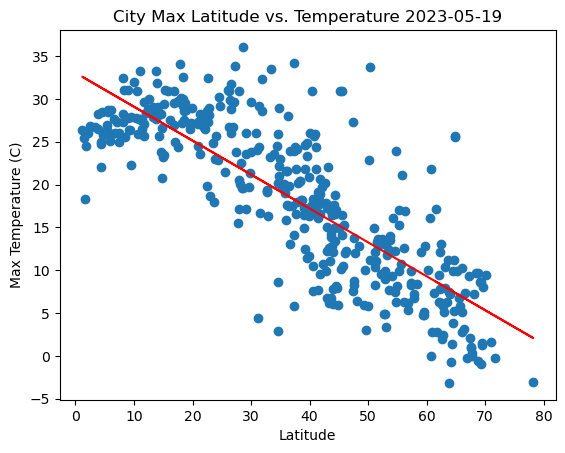

In [87]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40

# label the y axis
y_label = 'Max Temperature (C)'
plt.title("City Max Latitude (Northern Hemisphere) vs. Temperature 2023-05-19")
plt.grid(True)

# run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# annotate the plot with line equation and r-squared value
plt.annotate(line_eq, (10, -10), fontsize=15, color="red")

# save the plot as a png to the neighboring output_data folder
plt.savefig("output_data/Fig5.png")
plt.show()

The r-value is: 0.6611786055867102


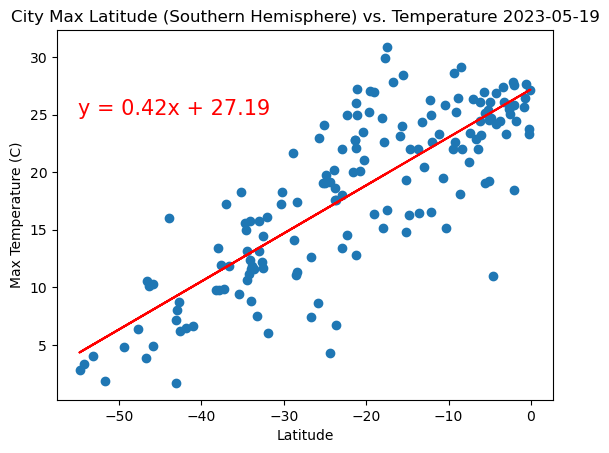

In [98]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40

# label the y axis
y_label = 'Max Temperature (C)'
plt.title("City Max Latitude (Southern Hemisphere) vs. Temperature 2023-05-19")
plt.grid(True)

# run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# annotate the plot with line equation and r-squared value
plt.annotate(line_eq, (-55, 25), fontsize=15, color="red")

# save the plot as a png to the neighboring output_data folder
plt.savefig("output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0025792870384924


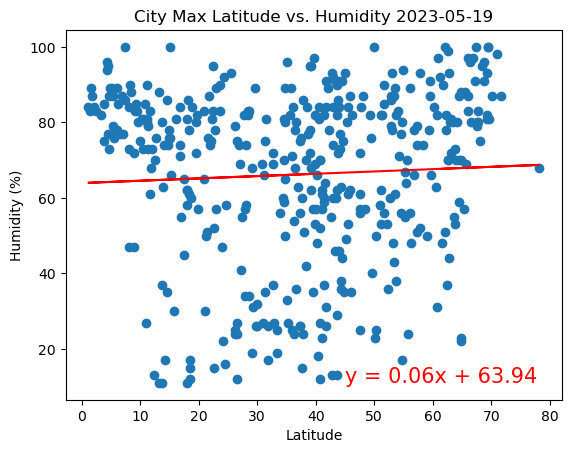

In [96]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40

# label the y axis
y_label = 'Humidity (%)'
plt.title("City Max Latitude (Northern Hemisphere) vs. Humidity 2023-05-19")
plt.grid(True)

# run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# annotate the plot with line equation and r-squared value
plt.annotate(line_eq, (45, 11), fontsize=15, color="red")

# save the plot as a png to the neighboring output_data folder
plt.savefig("output_data/Fig7.png")
plt.show()

The r-value is: 0.0111908346343122


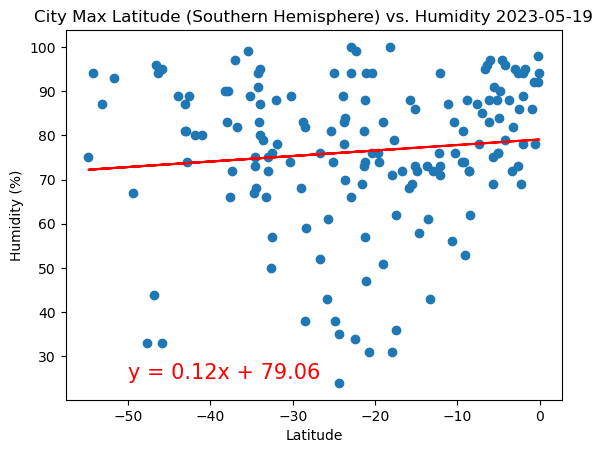

In [102]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40

# label the y axis
y_label = 'Humidity (%)'
plt.title("City Max Latitude (Southern Hemisphere) vs. Humidity 2023-05-19")
plt.grid(True)

# run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# annotate the plot with line equation and r-squared value
plt.annotate(line_eq, (-50, 25), fontsize=15, color="red")

# save the plot as a png to the neighboring output_data folder
plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0035354151139743


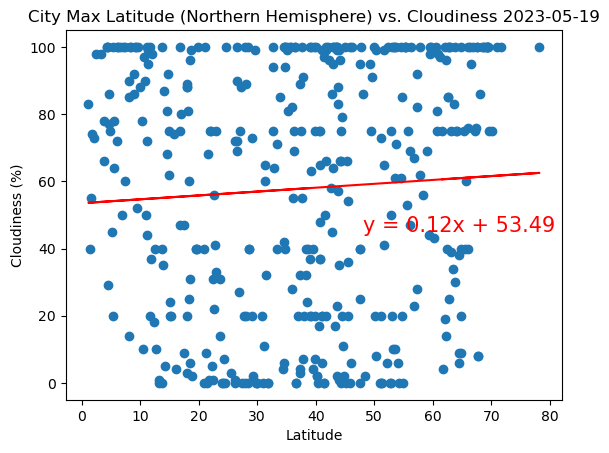

In [108]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40

# label the y axis
y_label = 'Cloudiness (%)'
plt.title("City Max Latitude (Northern Hemisphere) vs. Cloudiness 2023-05-19")
plt.grid(True)

# run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# annotate the plot with line equation and r-squared value
plt.annotate(line_eq, (48, 45), fontsize=15, color="red")

# save the plot as a png to the neighboring output_data folder
plt.savefig("output_data/Fig9.png")
plt.show()

The r-value is: 0.0296686561748577


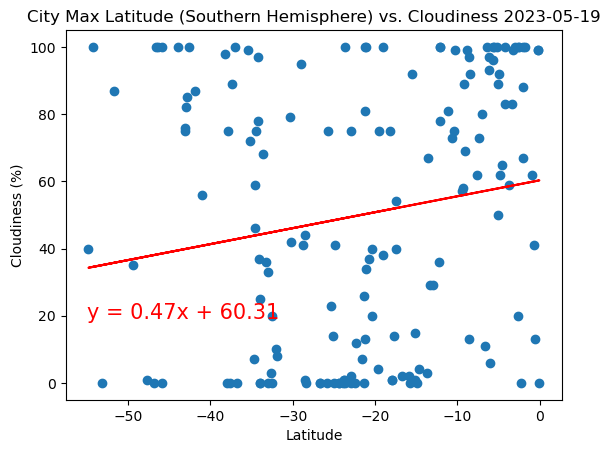

In [113]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40

# label the y axis
y_label = 'Cloudiness (%)'
plt.title("City Max Latitude (Southern Hemisphere) vs. Cloudiness 2023-05-19")
plt.grid(True)

# run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# annotate the plot with line equation and r-squared value
plt.annotate(line_eq, (-55, 19), fontsize=15, color="red")

# save the plot as a png to the neighboring output_data folder
plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
url_side = "https://api.openweathermap.org/data/2.5/weather?id=524901&appid=477790e97a5434da7cc7e8149a3f45fc"
response2 = requests.get(url_side)
data2 = response2.json()
print(json.dumps(data2, indent=4, sort_keys=True))

In [ ]:
print(city_url_percent)

In [4]:
print(city_data)

[{'City': 'kruisfontein', 'Lat': -34.0033, 'Lng': 24.7314, 'Max Temp': 290.86, 'Humidity': 55, 'Cloudiness': 92, 'Wind Speed': {'speed': 0.85, 'deg': 189, 'gust': 1.89}, 'Country': 'ZA', 'Date': 1684502957}, {'City': 'chernyshevskiy', 'Lat': 63.0128, 'Lng': 112.4714, 'Max Temp': 277.56, 'Humidity': 63, 'Cloudiness': 44, 'Wind Speed': {'speed': 1.87, 'deg': 264, 'gust': 1.92}, 'Country': 'RU', 'Date': 1684502373}, {'City': 'hastings', 'Lat': 50.8552, 'Lng': 0.5729, 'Max Temp': 290.59, 'Humidity': 72, 'Cloudiness': 100, 'Wind Speed': {'speed': 4.95, 'deg': 48, 'gust': 6.66}, 'Country': 'GB', 'Date': 1684502939}, {'City': 'foz', 'Lat': 43.5692, 'Lng': -7.2544, 'Max Temp': 289.69, 'Humidity': 62, 'Cloudiness': 6, 'Wind Speed': {'speed': 5.35, 'deg': 35, 'gust': 7.34}, 'Country': 'ES', 'Date': 1684502958}, {'City': 'akureyri', 'Lat': 65.6835, 'Lng': -18.0878, 'Max Temp': 287.11, 'Humidity': 51, 'Cloudiness': 40, 'Wind Speed': {'speed': 8.23, 'deg': 200}, 'Country': 'IS', 'Date': 1684502958}

https://api.openweathermap.org/data/2.5/weather?q=london&appid=71865936485836c318464e967c0fb49a
